In [20]:
import gluon
import view_gluon

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import utils

import gvar as gv

utils.set_mplstyle()

In [21]:
Nt = 32
mode = "VR"

renorm_mu = -58
escale = 1.7606
Tc=167

In [22]:
test_list = [f"Gen2l_32x32n{i}-VR" for i in range(1,6)]
test_list

['Gen2l_32x32n1-VR',
 'Gen2l_32x32n2-VR',
 'Gen2l_32x32n3-VR',
 'Gen2l_32x32n4-VR',
 'Gen2l_32x32n5-VR']

In [23]:

prop = view_gluon.propagator(Nt,"VR",n_samples=test_list,gtype="coulomb")
print(Nt,len(prop.prop_info))
q = prop.q
D = prop.D.copy()
    
# Lattice momentum correction
qi = prop.correct_q(q,qtype="improved")
    
#qc, Dc = prop.cone_cut(radius=1)

#prop.q = qc
#prop.D = Dc
    
# Renormalize
prop.renormalize(xi=3.5)

32 5


/home/ben/Work/gluon-prop/view_gluon.py:91: RuntimeWarning: divide by zero encountered in divide
  z = xi*p0/norm_p


In [24]:
prop.f

array([6.51(55), 3.65(25), 2.61(20), ..., 0.263(17), 0.243(18), 0.241(15)],
      dtype=object)

In [25]:
prop.alpha

0.56280(78)

In [26]:
qnorm = [np.linalg.norm(_q[1:]) for _q in qi]

In [27]:
fqnorm = [np.linalg.norm(_q[1:]) for _q in qi[qi[:,0]==0]]

Text(0.5, 1.0, '32x32-VR')

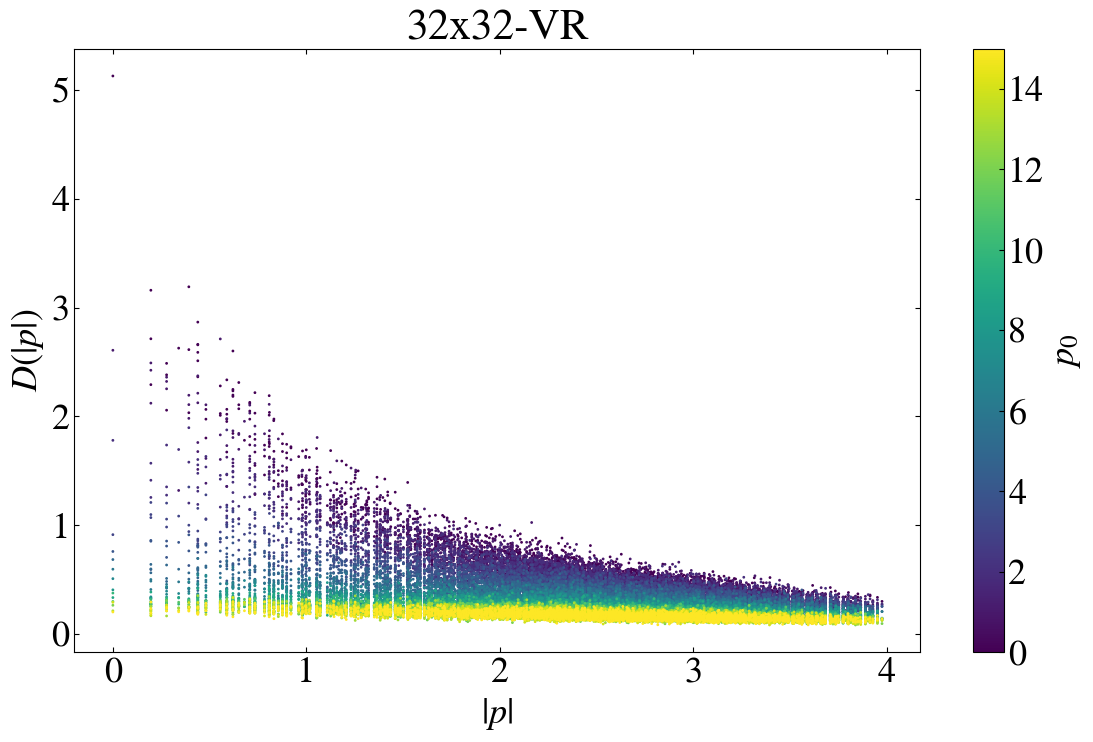

In [28]:
plt.figure(figsize=(12,8))
cbar = plt.scatter(qnorm,[d.mean for d in D],s=1,c=q[:,0])
#cbar = plt.scatter(fqnorm[1:],[d.mean for d in prop.f],s=1,c='k')
plt.colorbar(cbar,label="$p_0$")
plt.ylabel("$D(|p|)$")
plt.xlabel("$|p|$")
plt.title(f"{Nt}x32-{mode}")

In [9]:
qnorm = np.asarray([np.linalg.norm(qi[1:]) for qi in q[q[:,0]==0][1:]])

<ErrorbarContainer object of 3 artists>

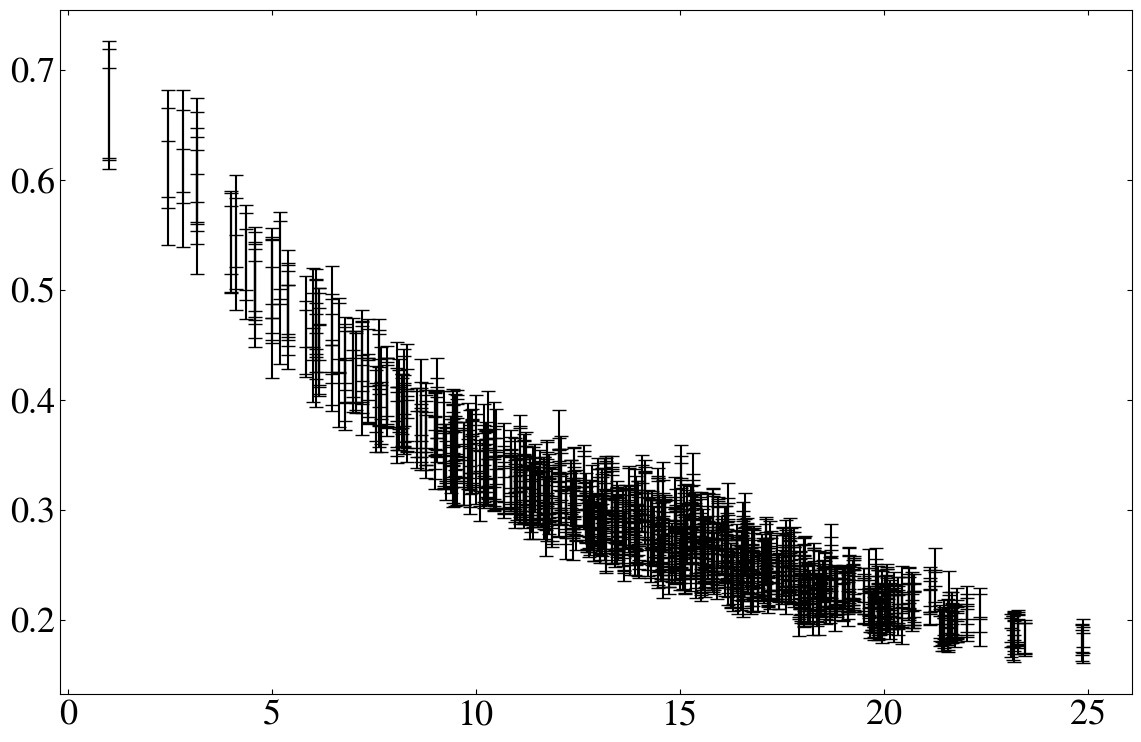

In [10]:
plt.figure(figsize=(12,8))
plt.errorbar(qnorm[::3],[d.mean for d in prop.f][::3],[d.sdev for d in prop.f][::3],c='k',ls='')
#plt.yscale('log')